**Tugas Besar 2 MK Dasar Pemodelan dan Simulasi T.A. 2019/2020**


1. Buala Leonardo Hulu (1301160802)
2. Rahman Imanullah (1301160788)
3. Qauli Adzkia (1301164650)




## Import Library yang akan digunakan

In [0]:
#import library

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from IPython.display import HTML
import random

## Inisialisasi variabel scalar

In [0]:
#inisialisasi variabel

jlh_individu = 200 #jumlah individu
rasioindividu_infeksi = 0.05 #rasio individu terinfeksi
probabilitas_gerak = 0.8 #probabilitas individu bergerak
waktu_pulih = 10 #waktu pemulihan

#ukuran ruang simulasi
x_min = 0
x_max = 20
y_min = 0
y_max = 20

## Untuk menampilkan gambar

In [0]:
#definisi kelas untuk menampilkan gambar

class Visual:
  def __init__(self, x, y, status_infeksi, status_imun, waktu_infeksi):
    self.x = x
    self.y = y
    self.status_infeksi = status_infeksi
    self.status_imun = status_imun
    self.waktu_infeksi = waktu_infeksi
    self.color = "red" if status_infeksi==True else "blue"

## Inisialisasi Variabel dengan List

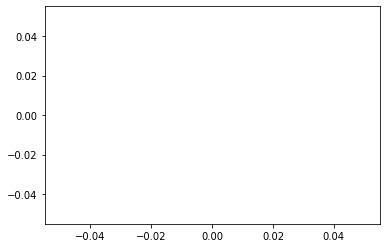

In [4]:
#inisialisasi variabel dengan list
fig, ax = plt.subplots()
ln = [plt.plot([], [], 'ro')[0] for i in range(0, jlh_individu)]
patches = ln

individu_infeksi = 0
community_jalan=[]
komunitas = []
for i in range(0, jlh_individu):
  random_health_rate = random.uniform(0, 1);
  if individu_infeksi <= rasioindividu_infeksi * jlh_individu:
    individu = Visual(random.randint(x_min, x_max), random.randint(y_min, y_max), True, False, 0)
    individu_infeksi+=1
  else:
    individu = Visual(random.randint(x_min, x_max), random.randint(y_min, y_max), False, False, 0)
  komunitas.append(individu)
community_jalan.append(komunitas[:])

## Implementasi dan Hasil


In [5]:
#Implementasi terhadap iterasi yang sudah di inisialisasi

i = 1

while(individu_infeksi > 0):
  individu_infeksi = 0
  infeksi_per_hari = 0
  komunitas = []
  for j in range(0, jlh_individu):
    old_individu = community_jalan[i-1][j]
    x = old_individu.x
    y = old_individu.y
    status_infeksi = old_individu.status_infeksi
    status_imun = old_individu.status_imun
    waktu_infeksi = old_individu.waktu_infeksi

    direction = (random.uniform(0, 1))
    arah = (random.uniform(0, 1))
    if(arah >= probabilitas_gerak):
    #update posisi
      direction = (random.uniform(0, 1))
    # right
    if(direction <=0.25):
      x += 1
    #down
    elif(direction <=0.50):
      y -= 1
    #left
    elif(direction <=0.75):
      x -= 1
    #up
    elif(direction == 1):
      y +=1

    #performpbccorrection
    if(x<x_min):
      x = x_max + 1
    if(x>x_max):
      x = x_max - 1
    if(y<y_min):
      y = y_max + 1
    if(y>y_max):
      y = y_max - 1

    if(status_infeksi==True):
      waktu_infeksi += 1 #Update waktu terinfeksi untuk individu yang sudah terinfeksi
      if(waktu_infeksi > waktu_pulih): #Update status kesehatan individu (recovery)
        status_imun = True
        status_infeksi = False
    else:
      for individu_lain in komunitas:
        if(individu_lain.x == x and individu_lain.y == y and individu_lain.status_infeksi==True and status_infeksi==False and status_imun==False):
          status_infeksi = True
          infeksi_per_hari +=1

    if(status_infeksi==True): #Update status kesehatan individu (infection)
      individu_infeksi +=1

    individu = Visual(x, y, status_infeksi, status_imun, waktu_infeksi)
    komunitas.append(individu)
  community_jalan.append(komunitas[:])  
  
  print(f"Hari ke-{i}")
  print(f"-Terinfeksi Baru  : {infeksi_per_hari}")
  print(f"-Terinfeksi Total : {individu_infeksi}")
  i+=1

print("Waktu Pemulihan :", i-1, "Hari")

Hari ke-1
-Terinfeksi Baru  : 3
-Terinfeksi Total : 14
Hari ke-2
-Terinfeksi Baru  : 3
-Terinfeksi Total : 17
Hari ke-3
-Terinfeksi Baru  : 7
-Terinfeksi Total : 24
Hari ke-4
-Terinfeksi Baru  : 4
-Terinfeksi Total : 28
Hari ke-5
-Terinfeksi Baru  : 3
-Terinfeksi Total : 31
Hari ke-6
-Terinfeksi Baru  : 5
-Terinfeksi Total : 36
Hari ke-7
-Terinfeksi Baru  : 6
-Terinfeksi Total : 42
Hari ke-8
-Terinfeksi Baru  : 2
-Terinfeksi Total : 44
Hari ke-9
-Terinfeksi Baru  : 6
-Terinfeksi Total : 50
Hari ke-10
-Terinfeksi Baru  : 3
-Terinfeksi Total : 53
Hari ke-11
-Terinfeksi Baru  : 1
-Terinfeksi Total : 43
Hari ke-12
-Terinfeksi Baru  : 1
-Terinfeksi Total : 41
Hari ke-13
-Terinfeksi Baru  : 1
-Terinfeksi Total : 39
Hari ke-14
-Terinfeksi Baru  : 2
-Terinfeksi Total : 34
Hari ke-15
-Terinfeksi Baru  : 3
-Terinfeksi Total : 33
Hari ke-16
-Terinfeksi Baru  : 4
-Terinfeksi Total : 34
Hari ke-17
-Terinfeksi Baru  : 0
-Terinfeksi Total : 29
Hari ke-18
-Terinfeksi Baru  : 2
-Terinfeksi Total : 25
H

In [10]:
print("Waktu Pemulihan :", i-1, "Hari")

Waktu Pemulihan : 43 Hari


## Membuat Hasil Plot dengan Video Simulasi

In [0]:
def init():
    ax.set_xlim(x_min-1, x_max+1)
    ax.set_ylim(y_min-1, y_max+1)
    return patches

In [0]:
def update(i):
    for j, line in enumerate(ln):
        line.set_data(community_jalan[i][j].x, community_jalan[i][j].y)
        line.set_color(community_jalan[i][j].color)
    return patches

In [0]:
animation = FuncAnimation(fig, update, frames=len(community_jalan), interval=100, init_func=init, blit=True)
rc('animation', html='jshtml')

In [14]:
print("Merah = infeksi virus")
print("Biru = tidak terkena virus/sudah pulih")
animation


Merah = infeksi virus
Biru = tidak terkena virus/sudah pulih
